In [128]:
import pandas as pd
import awswrangler as wr
import configparser
import boto3

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, MultipleLocator
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [129]:
config = configparser.ConfigParser()
config.read_file(open('credentials.cfg'))

KEY    = config.get('AWS_USER','ACCESS_KEY')
SECRET = config.get('AWS_USER','SECRET_ACCESS_KEY')
REGION = config.get("AWS_USER", 'AWS_DEFAULT_REGION')
BUCKET_NAME = config.get('OTHERS','BUCKET_NAME')

In [130]:
s3 = boto3.resource(service_name='s3'
                    , region_name=REGION
                    , aws_access_key_id=KEY
                    , aws_secret_access_key=SECRET)

my_bucket = s3.Bucket(f'{BUCKET_NAME}')

file_list = []
for my_bucket_object in my_bucket.objects.filter(Prefix='output'):
    if my_bucket_object.key[-4:] == '.csv':
        file_list.append(my_bucket_object.key)

file_list

/Users/unhuman_dev/.local/share/virtualenvs/MRT_spark-cE_QeqCx/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


['output/01-mthly-ttl-traffic-20220910_13-15-46/part-00000-28043933-3331-4a56-a23b-a20414324886-c000.csv',
 'output/02-mthly-station-traffic-20220911_06-52-44/part-00000-7ab473e0-d64c-4af8-a940-532529396ccc-c000.csv',
 'output/03-mthly-line-traffic-20220912_07-00-45/part-00000-b91d552a-247f-44d2-ad8a-551a7df8a860-c000.csv',
 'output/03-wkly-ttl-traffic-20220911_05-24-45/part-00000-9b882121-340f-4a6b-bf2c-6d40e454cb8b-c000.csv',
 'output/04-daily-maxmin-traffic-20220908_06-48-37/part-00000-e2bd5849-a932-4907-a877-dfdaf84a9342-c000.csv',
 'output/04-daily-maxmin-traffic-20220910_13-15-46/part-00000-d00c8c19-79b6-4654-b95a-d6110eb7b9db-c000.csv',
 'output/04-daily-maxmin-traffic-20220910_13-15-46/part-00001-d00c8c19-79b6-4654-b95a-d6110eb7b9db-c000.csv',
 'output/04-daily-maxmin-traffic-20220910_13-15-46/part-00002-d00c8c19-79b6-4654-b95a-d6110eb7b9db-c000.csv',
 'output/04-daily-maxmin-traffic-20220910_13-15-46/part-00003-d00c8c19-79b6-4654-b95a-d6110eb7b9db-c000.csv',
 'output/04-daily-

# 每月總人次

## 整體

### data

In [131]:
file_list = []
for my_bucket_object in my_bucket.objects.filter(Prefix='output'):
    if my_bucket_object.key[-4:] == '.csv' and 'mthly' in my_bucket_object.key:
        file_list.append(my_bucket_object.key)

print(file_list)

session = boto3.Session(region_name=REGION
                        , aws_access_key_id=KEY
                        , aws_secret_access_key=SECRET)

file = file_list[-3]
print(file)
df = wr.s3.read_csv(path=f's3://{BUCKET_NAME}/{file}',
                    boto3_session=session)

df['dt'] = pd.to_datetime(df['yr-month'], format='%Y-%m-%d')
df = df.sort_values(by='dt')
display(df.head()), df.info()

['output/01-mthly-ttl-traffic-20220910_13-15-46/part-00000-28043933-3331-4a56-a23b-a20414324886-c000.csv', 'output/02-mthly-station-traffic-20220911_06-52-44/part-00000-7ab473e0-d64c-4af8-a940-532529396ccc-c000.csv', 'output/03-mthly-line-traffic-20220912_07-00-45/part-00000-b91d552a-247f-44d2-ad8a-551a7df8a860-c000.csv', 'output/mthly-01-ttl-traffic-20220917_01-44-18/part-00000-f4375007-8501-495d-b2ea-53fa2cc1225d-c000.csv', 'output/mthly-02-station-traffic-20220917_01-44-18/part-00000-6542ebb1-f944-4892-930d-bc7cfcf4fbe7-c000.csv', 'output/mthly-03-line-traffic-20220917_01-44-18/part-00000-01516f5b-6a8a-470f-90a2-434e4f7a5012-c000.csv']
output/mthly-01-ttl-traffic-20220917_01-44-18/part-00000-f4375007-8501-495d-b2ea-53fa2cc1225d-c000.csv


,yr-month,last_day,sum,dt
0,2017-1,31,119947872,2017-01-01
4,2017-2,28,114487004,2017-02-01
5,2017-3,31,131477534,2017-03-01
6,2017-4,30,121944898,2017-04-01
7,2017-5,31,124547060,2017-05-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   yr-month  68 non-null     object        
 1   last_day  68 non-null     int64         
 2   sum       68 non-null     int64         
 3   dt        68 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.7+ KB


(None, None)

### plot

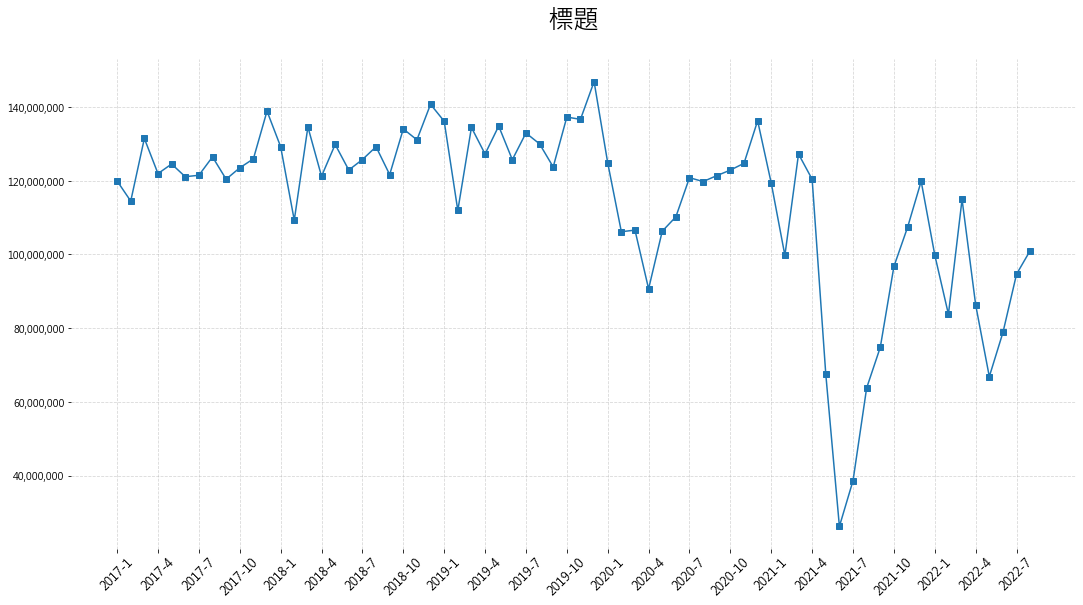

In [132]:
x = df['yr-month']
y = df['sum']

fig, ax = plt.subplots(figsize=(18,9))
ax.grid(axis='both', linestyle='--', alpha=0.5)
plt.setp(ax.spines.values(), color=(0,0,0,0))


ax.set_title('標題', y=1.05, size=26)



ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.plot(x, y, marker='s')
#ax.plot(x, y2, marker='s')


frq=3
ax.set_xticks(df['yr-month'].iloc[::frq])
ax.set_xticklabels(df['yr-month'].iloc[::frq],
                         rotation=45,
                         fontsize=12)

plt.show()

## 路線

### data

In [134]:
file_list = []
for my_bucket_object in my_bucket.objects.filter(Prefix='output'):
    if my_bucket_object.key[-4:] == '.csv' and 'mthly' in my_bucket_object.key:
        file_list.append(my_bucket_object.key)

display(file_list)

session = boto3.Session(region_name=REGION
                        , aws_access_key_id=KEY
                        , aws_secret_access_key=SECRET)


file=file_list[-1]
print(file)
df = wr.s3.read_csv(path=f's3://{BUCKET_NAME}/{file}',
                    boto3_session=session)

df['dt'] = pd.to_datetime(df['yr-month'], format='%Y-%m-%d')
df = df.sort_values(by='dt')
display(df.head()), df.info()

['output/01-mthly-ttl-traffic-20220910_13-15-46/part-00000-28043933-3331-4a56-a23b-a20414324886-c000.csv',
 'output/02-mthly-station-traffic-20220911_06-52-44/part-00000-7ab473e0-d64c-4af8-a940-532529396ccc-c000.csv',
 'output/03-mthly-line-traffic-20220912_07-00-45/part-00000-b91d552a-247f-44d2-ad8a-551a7df8a860-c000.csv',
 'output/mthly-01-ttl-traffic-20220917_01-44-18/part-00000-f4375007-8501-495d-b2ea-53fa2cc1225d-c000.csv',
 'output/mthly-02-station-traffic-20220917_01-44-18/part-00000-6542ebb1-f944-4892-930d-bc7cfcf4fbe7-c000.csv',
 'output/mthly-03-line-traffic-20220917_01-44-18/part-00000-01516f5b-6a8a-470f-90a2-434e4f7a5012-c000.csv']

output/mthly-03-line-traffic-20220917_01-44-18/part-00000-01516f5b-6a8a-470f-90a2-434e4f7a5012-c000.csv


,yr-month,last_day,line,sum,dt
0,2017-1,31,BL,45273702,2017-01-01
1,2017-1,31,BR,16988106,2017-01-01
2,2017-1,31,G,26561606,2017-01-01
3,2017-1,31,O,25097332,2017-01-01
4,2017-1,31,R,39652713,2017-01-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 407
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   yr-month  408 non-null    object        
 1   last_day  408 non-null    int64         
 2   line      408 non-null    object        
 3   sum       408 non-null    int64         
 4   dt        408 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.1+ KB


(None, None)

### plot

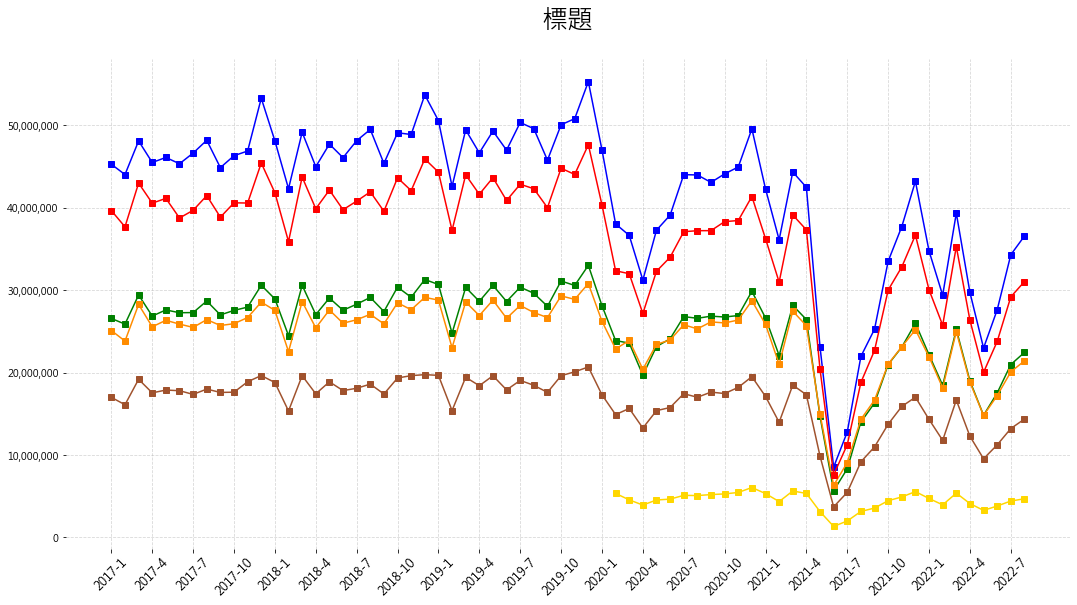

In [136]:
x = df['yr-month'].unique()
y1 = df[df['line']=='BL']['sum']
y2 = df[df['line']=='BR']['sum']
y3 = df[df['line']=='G']['sum']
y4 = df[df['line']=='O']['sum']
y5 = df[df['line']=='R']['sum']

x2 = df[(df['line']=='Y') & (df['dt']>'2020-01-01')]['yr-month']
y6 = df[(df['line']=='Y') & (df['dt']>'2020-01-01')]['sum']

fig, ax = plt.subplots(figsize=(18,9))
ax.grid(axis='both', linestyle='--', alpha=0.5)
plt.setp(ax.spines.values(), color=(0,0,0,0))


ax.set_title('標題', y=1.05, size=26)



ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.plot(x, y1, marker='s', color='blue')
ax.plot(x, y2, marker='s', color='sienna')
ax.plot(x, y3, marker='s', color='green')
ax.plot(x, y4, marker='s', color='darkorange')
ax.plot(x, y5, marker='s', color='red')
ax.plot(x2, y6, marker='s', color='gold')



# ax.axvline(x="2020-1", color=(0,0,0,0.9))#, label="2020除夕")
# ax.axvline(x="2021-2", color=(0,0,0,0.9))#, label="2021除夕")
# ax.axvline(x="2021-5", color=(0,0,0,0.9))#, label="全國升三級警戒")
# ax.axvline(x="2022-1", color=(0,0,0,0.9))#, label="全國降二級警戒")
# ax.axvline(x="2022-4", color=(0,0,0,0.9))#, label="2022除夕")
# ax.axvline(x="2022-5", color=(0,0,0,0.9))#, label="確診數突破1萬")


frq=3
ax.set_xticks(x[::frq])
ax.set_xticklabels(x[::frq],
                         rotation=45,
                         fontsize=12)

plt.show()

# 每週總人次

## 整體

### data

In [138]:
file_list = []
for my_bucket_object in my_bucket.objects.filter(Prefix='output'):
    if my_bucket_object.key[-4:] == '.csv' and '20220917' in my_bucket_object.key:
        file_list.append(my_bucket_object.key)

file_list

['output/mthly-01-ttl-traffic-20220917_01-44-18/part-00000-f4375007-8501-495d-b2ea-53fa2cc1225d-c000.csv',
 'output/mthly-02-station-traffic-20220917_01-44-18/part-00000-6542ebb1-f944-4892-930d-bc7cfcf4fbe7-c000.csv',
 'output/mthly-03-line-traffic-20220917_01-44-18/part-00000-01516f5b-6a8a-470f-90a2-434e4f7a5012-c000.csv',
 'output/wkly-01-ttl-traffic-20220917_01-59-20/part-00000-c20cdcee-93bf-4969-99bc-08cfb61aedc5-c000.csv',
 'output/wkly-02-line-traffic-20220917_01-59-20/part-00000-7610bda6-f787-41e2-b567-64643048bc9e-c000.csv']

In [143]:
file = file_list[-2]
df = wr.s3.read_csv(path=f's3://{BUCKET_NAME}/{file}',
                    boto3_session=session)

df['start_dt'] = pd.to_datetime(df['start_dt'])
df['end_dt'] = pd.to_datetime(df['end_dt'])

### plot

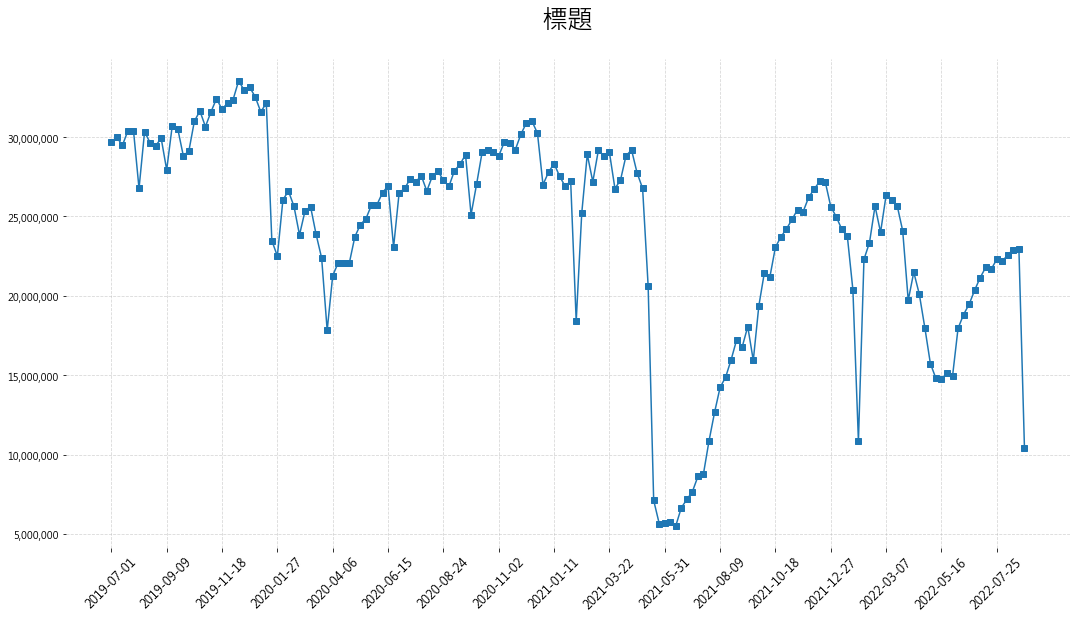

In [144]:
df_plot = df[df['start_dt']>='2019-06-30']
x = df_plot['start_dt']#.dt.strftime('%Y-%m-%d')
y = df_plot['ttl_traffic']

fig, ax = plt.subplots(figsize=(18,9))
ax.grid(axis='both', linestyle='--', alpha=0.5)
plt.setp(ax.spines.values(), color=(0,0,0,0))


ax.set_title('標題', y=1.05, size=26)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.plot(x, y, marker='s')


frq=10
ax.set_xticks(df_plot['start_dt'].iloc[::frq])
ax.set_xticklabels(df_plot['start_dt'].dt.strftime('%Y-%m-%d').iloc[::frq],
                         rotation=45,
                         fontsize=12)

plt.show()

## 依路線

### data

In [45]:
file = file_list[-1]
print(file)
df = wr.s3.read_csv(path=f's3://{BUCKET_NAME}/{file}',
                    boto3_session=session)

#df['start_dt'] = pd.to_datetime(df['start_dt'])
display(df.head(10)), df.info()

output/05-wkly-line-traffic-20220911_05-24-45/part-00000-bc08a4a4-9a06-4fdb-a34c-615e1e5e30e6-c000.csv


,year,weekOfYr,start_dt,end_dt,line,ttl_traffic
0,2016,52,2017-01-01,2017-01-01,BL,1461376
1,2016,52,2017-01-01,2017-01-01,BR,443101
2,2016,52,2017-01-01,2017-01-01,G,835987
3,2016,52,2017-01-01,2017-01-01,O,681538
4,2016,52,2017-01-01,2017-01-01,R,1437893
5,2016,52,2017-01-01,2017-01-01,Y,72807
6,2017,1,2017-01-02,2017-01-08,BL,10196998
7,2017,1,2017-01-02,2017-01-08,BR,3942379
8,2017,1,2017-01-02,2017-01-08,G,6076593
9,2017,1,2017-01-02,2017-01-08,O,5830288


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         1752 non-null   int64 
 1   weekOfYr     1752 non-null   int64 
 2   start_dt     1752 non-null   object
 3   end_dt       1752 non-null   object
 4   line         1752 non-null   object
 5   ttl_traffic  1752 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 82.2+ KB


(None, None)

### plot

In [115]:
# '2020-01-24', '2020除夕'
# '2021-02-11', '2021除夕'
# '2021-05-19', '全國升三級警戒'
# '2021-07-27', '全國降二級警戒'
# '2022-01-31', '2022除夕'
# '2022-04-28', '本土確診數突破1萬'
# '2022-05-27', '本土確診數突破9萬'

#ax.axvline(x='2020-wk9', color=(0,0,0,0.9), label=)


check_date='2022-02-03'

def return_vline_code(check_date, event):
    yr_wk = df_plot[(df_plot['start_dt']<=check_date) & \
                    (df_plot['end_dt']>=check_date)]['yr-wk'].unique()[0]
    
    return f'ax.axvline(x="{yr_wk}", color=(0,0,0,0.9), label="{event}")'

return_vline_code('2022-05-27', '本土確診數突破9萬')


'ax.axvline(x="2022-wk21", color=(0,0,0,0.9), label="本土確診數突破9萬")'

In [119]:
df_plot[df_plot['yr-wk']=='2020-wk14']

,year,weekOfYr,start_dt,end_dt,line,ttl_traffic,yr-wk
1020,2020,14,2020-03-30,2020-04-05,BL,6374742,2020-wk14
1021,2020,14,2020-03-30,2020-04-05,BR,2510736,2020-wk14
1022,2020,14,2020-03-30,2020-04-05,G,3827357,2020-wk14
1023,2020,14,2020-03-30,2020-04-05,O,3936135,2020-wk14
1024,2020,14,2020-03-30,2020-04-05,R,5442382,2020-wk14
1025,2020,14,2020-03-30,2020-04-05,Y,780373,2020-wk14


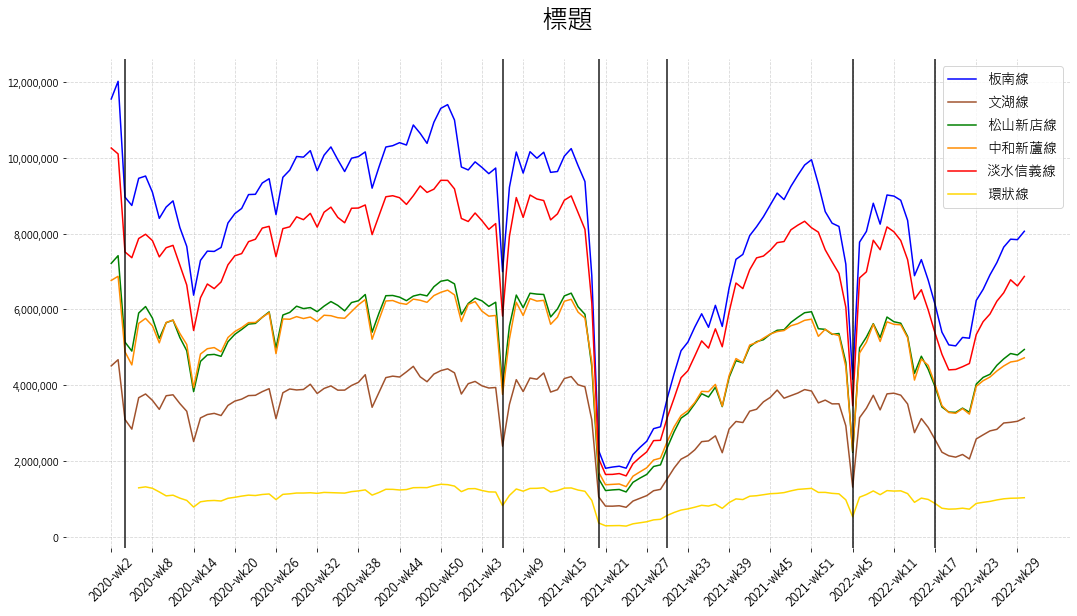

In [120]:
df_plot = df[df['start_dt']>='2019-12-31'].copy()
df_plot['yr-wk'] = df_plot['year'].astype(str) + '-wk' + df_plot['weekOfYr'].astype(str)
x = df_plot['yr-wk'].unique()
y1 = df_plot[df_plot['line']=='BL']['ttl_traffic']
y2 = df_plot[df_plot['line']=='BR']['ttl_traffic']
y3 = df_plot[df_plot['line']=='G']['ttl_traffic']
y4 = df_plot[df_plot['line']=='O']['ttl_traffic']
y5 = df_plot[df_plot['line']=='R']['ttl_traffic']




x2 = df_plot[(df_plot['line']=='Y') & (df_plot['start_dt']>'2020-01-31')]['yr-wk']
y6 = df_plot[(df_plot['line']=='Y') & (df_plot['start_dt']>'2020-01-31')]['ttl_traffic']

fig, ax = plt.subplots(figsize=(18,9))
ax.grid(axis='both', linestyle='--', alpha=0.5)
plt.setp(ax.spines.values(), color=(0,0,0,0))


ax.set_title('標題', y=1.05, size=26)



ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.plot(x, y1, color='blue', label='板南線')
ax.plot(x, y2, color='sienna', label='文湖線')
ax.plot(x, y3, color='green', label='松山新店線')
ax.plot(x, y4, color='darkorange', label='中和新蘆線')
ax.plot(x, y5, color='red', label='淡水信義線')
ax.plot(x2, y6, color='gold', label='環狀線')


ax.axvline(x="2020-wk4", color=(0,0,0,0.9))#, label="2020除夕")
ax.axvline(x="2021-wk6", color=(0,0,0,0.9))#, label="2021除夕")
ax.axvline(x="2021-wk20", color=(0,0,0,0.9))#, label="全國升三級警戒")
ax.axvline(x="2021-wk30", color=(0,0,0,0.9))#, label="全國降二級警戒")
ax.axvline(x="2022-wk5", color=(0,0,0,0.9))#, label="2022除夕")
ax.axvline(x="2022-wk17", color=(0,0,0,0.9))#, label="確診數突破1萬")
#ax.axvline(x="2022-wk21", color=(0,0,0,0.9))#, label="本土確診數突破9萬")



frq=6
ax.set_xticks(x[::frq])
ax.set_xticklabels(x[::frq],
                         rotation=45,
                         fontsize=12)
plt.legend(fontsize=14)
plt.show()